In [ ]:
#Import libraries

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import time

from IPython.core.display import clear_output
from shapely.geometry import Point
import plotly.express as px
import json

**Who's in the ISS right now ?**

In [ ]:
#API test with ISS API astros

In [2]:
astronaut_api = requests.get("http://api.open-notify.org/astros.json")

astronaut_api.status_code

200

In [3]:
iss_person = astronaut_api.json()
iss_person

{'message': 'success',
 'number': 5,
 'people': [{'craft': 'ISS', 'name': 'Chris Cassidy'},
  {'craft': 'ISS', 'name': 'Anatoly Ivanishin'},
  {'craft': 'ISS', 'name': 'Ivan Vagner'},
  {'craft': 'ISS', 'name': 'Doug Hurley'},
  {'craft': 'ISS', 'name': 'Bob Behnken'}]}

In [4]:
print('Currently there are ', iss_person['number'], ' people in space')

Currently there are  5  people in space


In [5]:
print('Currently ', iss_person['people'], ' are aboard the ISS')

Currently  [{'craft': 'ISS', 'name': 'Chris Cassidy'}, {'craft': 'ISS', 'name': 'Anatoly Ivanishin'}, {'craft': 'ISS', 'name': 'Ivan Vagner'}, {'craft': 'ISS', 'name': 'Doug Hurley'}, {'craft': 'ISS', 'name': 'Bob Behnken'}]  are aboard the ISS


**API Call to get ISS real time position**

In [7]:
# Create a loop to get the ISS info every 7 seconds - takes about 3h
ISS_loc = []
count = 0

while count <= 2200:
    print('The rocket is on the launch pad - looking for 2200 location')
    print(f'ISS API call - request# {count}/2200')
    
    #API call    
    response = requests.get("http://api.open-notify.org/iss-now.json")
    status = response.status_code
    
    #print status code
    if status != 200:
        print(f'API call crashes - code is {status}')
        break

    resp = response.json()
    #append each API response to ISS_loc list
    ISS_loc.append(resp)
    print(ISS_loc[count])
    
    #7 sec pause btw each API call - allows ISS to move slightly
    time.sleep(7)
    
    # clear the output of each print to make things neater
    clear_output(wait = True)

    count += 1

The rocket is on the launch pad - looking for 2200 location
ISS API call - request# 2200/2200
{'timestamp': 1591306436, 'message': 'success', 'iss_position': {'latitude': '16.9023', 'longitude': '-154.0466'}}


In [8]:
#printing out 5 first responses to check out API result
ISS_loc[:5]
#dict with 2 payloads : timestamp & iss_position

[{'timestamp': 1591290239,
  'message': 'success',
  'iss_position': {'latitude': '40.1954', 'longitude': '-57.3718'}},
 {'timestamp': 1591290246,
  'message': 'success',
  'iss_position': {'latitude': '40.4777', 'longitude': '-56.8838'}},
 {'timestamp': 1591290254,
  'message': 'success',
  'iss_position': {'latitude': '40.7576', 'longitude': '-56.3915'}},
 {'timestamp': 1591290261,
  'message': 'success',
  'iss_position': {'latitude': '41.0168', 'longitude': '-55.9278'}},
 {'timestamp': 1591290268,
  'message': 'success',
  'iss_position': {'latitude': '41.2922', 'longitude': '-55.4268'}}]

In [9]:
#initializing empty dict to populate
ISS_dict = {'latitude':None, 'longitude':None, 'timestamp':None}

# Initialize empty lists to populate with values from the API
lat_list = []
long_list = []
time_list = []

for i in range(len(ISS_loc)):
    lat_list.append(ISS_loc[i]['iss_position']['latitude'])
    long_list.append(ISS_loc[i]['iss_position']['longitude'])
    time_list.append(ISS_loc[i]['timestamp'])

#populate ISS dict
ISS_dict['latitude'] = lat_list
ISS_dict['longitude'] = long_list
ISS_dict['timestamp'] = time_list

In [10]:
#making pd df
ISS_df = pd.DataFrame(ISS_dict)

In [11]:
ISS_df

,latitude,longitude,timestamp
0,40.1954,-57.3718,1591290239
1,40.4777,-56.8838,1591290246
2,40.7576,-56.3915,1591290254
3,41.0168,-55.9278,1591290261
4,41.2922,-55.4268,1591290268
...,...,...,...
2196,15.4430,-155.2086,1591306406
2197,15.8147,-154.9150,1591306414
2198,16.1860,-154.6201,1591306422
2199,16.5320,-154.3439,1591306429


In [26]:
#exporting to local csv
ISS_df.to_csv('iss_df.csv', index=False)

In [12]:
# Change values to integers from strings
ISS_df['latitude'] = ISS_df['latitude'].astype(float)
ISS_df['longitude'] = ISS_df['longitude'].astype(float)
ISS_df['timestamp'] = ISS_df['timestamp'].astype(float)

In [13]:
ISS_df['coordinates'] = ISS_df[['longitude', 'latitude']].values.tolist()

ISS_df

,latitude,longitude,timestamp,coordinates
0,40.1954,-57.3718,1.591290e+09,"[-57.3718, 40.1954]"
1,40.4777,-56.8838,1.591290e+09,"[-56.8838, 40.4777]"
2,40.7576,-56.3915,1.591290e+09,"[-56.3915, 40.7576]"
3,41.0168,-55.9278,1.591290e+09,"[-55.9278, 41.0168]"
4,41.2922,-55.4268,1.591290e+09,"[-55.4268, 41.2922]"
...,...,...,...,...
2196,15.4430,-155.2086,1.591306e+09,"[-155.2086, 15.443]"
2197,15.8147,-154.9150,1.591306e+09,"[-154.915, 15.8147]"
2198,16.1860,-154.6201,1.591306e+09,"[-154.6201, 16.186]"
2199,16.5320,-154.3439,1.591306e+09,"[-154.3439, 16.532]"


In [14]:
# Make the coordinate column a Point object
ISS_df['coordinates'] = ISS_df['coordinates'].apply(Point)
ISS_df

,latitude,longitude,timestamp,coordinates
0,40.1954,-57.3718,1.591290e+09,POINT (-57.3718 40.1954)
1,40.4777,-56.8838,1.591290e+09,POINT (-56.8838 40.4777)
2,40.7576,-56.3915,1.591290e+09,POINT (-56.3915 40.7576)
3,41.0168,-55.9278,1.591290e+09,POINT (-55.9278 41.0168)
4,41.2922,-55.4268,1.591290e+09,POINT (-55.4268 41.2922)
...,...,...,...,...
2196,15.4430,-155.2086,1.591306e+09,POINT (-155.2086 15.443)
2197,15.8147,-154.9150,1.591306e+09,POINT (-154.915 15.8147)
2198,16.1860,-154.6201,1.591306e+09,POINT (-154.6201 16.186)
2199,16.5320,-154.3439,1.591306e+09,POINT (-154.3439 16.532)


In [15]:
#convert to GeoPandas df
geo_ISS = gpd.GeoDataFrame(ISS_df,
                                geometry='coordinates',
                                crs={'init':'epsg:4326'})

geo_ISS

,latitude,longitude,timestamp,coordinates
0,40.1954,-57.3718,1.591290e+09,POINT (-57.37180 40.19540)
1,40.4777,-56.8838,1.591290e+09,POINT (-56.88380 40.47770)
2,40.7576,-56.3915,1.591290e+09,POINT (-56.39150 40.75760)
3,41.0168,-55.9278,1.591290e+09,POINT (-55.92780 41.01680)
4,41.2922,-55.4268,1.591290e+09,POINT (-55.42680 41.29220)
...,...,...,...,...
2196,15.4430,-155.2086,1.591306e+09,POINT (-155.20860 15.44300)
2197,15.8147,-154.9150,1.591306e+09,POINT (-154.91500 15.81470)
2198,16.1860,-154.6201,1.591306e+09,POINT (-154.62010 16.18600)
2199,16.5320,-154.3439,1.591306e+09,POINT (-154.34390 16.53200)


In [23]:
#Importing world map shapefile from the web as geopandas df
earth_shp = gpd.read_file('http://thematicmapping.org/downloads/TM_WORLD_BORDERS-0.3.zip')

earth_shp.head()

,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,geometry
0,AC,AG,ATG,28,Antigua and Barbuda,44,83039,19,29,-61.783,17.078,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,AG,DZ,DZA,12,Algeria,238174,32854159,2,15,2.632,28.163,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
2,AJ,AZ,AZE,31,Azerbaijan,8260,8352021,142,145,47.395,40.430,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
3,AL,AL,ALB,8,Albania,2740,3153731,150,39,20.068,41.143,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
4,AM,AM,ARM,51,Armenia,2820,3017661,142,145,44.563,40.534,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."


In [18]:
earth_shp.shape

(246, 12)

In [19]:
# Further inspection of the earth geodataframe
earth_shp.describe

<bound method NDFrame.describe of     FIPS ISO2 ISO3   UN                                  NAME    AREA  \
0     AC   AG  ATG   28                   Antigua and Barbuda      44   
1     AG   DZ  DZA   12                               Algeria  238174   
2     AJ   AZ  AZE   31                            Azerbaijan    8260   
3     AL   AL  ALB    8                               Albania    2740   
4     AM   AM  ARM   51                               Armenia    2820   
..   ...  ...  ...  ...                                   ...     ...   
241   TB   BL  BLM  652                      Saint Barthelemy       0   
242   GK   GG  GGY  831                              Guernsey       0   
243   JE   JE  JEY  832                                Jersey       0   
244   SX   GS  SGS  239  South Georgia South Sandwich Islands       0   
245   TW   TW  TWN  158                                Taiwan       0   

      POP2005  REGION  SUBREGION      LON     LAT  \
0       83039      19         29  -6

In [ ]:
#Testing out world map plotting

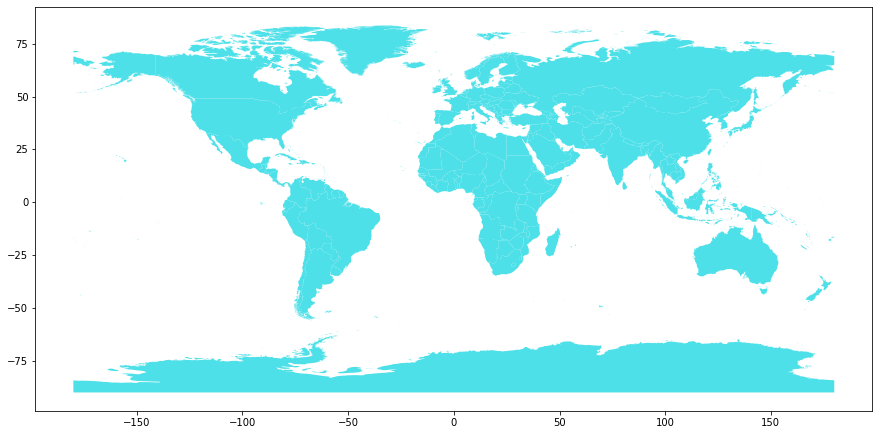

In [20]:
earth_shp.plot(figsize=(15,10), color='#4DE0E8')

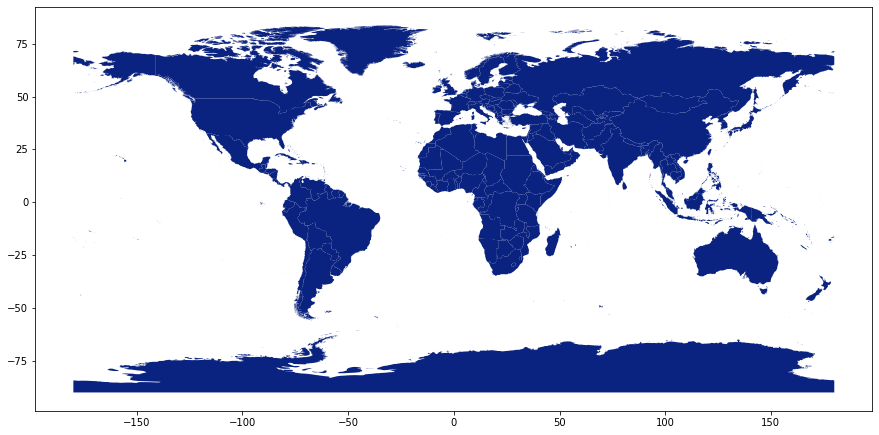

In [24]:
earth_shp['geometry'].plot(figsize=(15,10),  color='#0B2380')

In [ ]:
#Plot the ISS Path
geo_ISS['coordinates'].plot(figsize=(15,10), color='blue')

geo_ISS

### And here it is - plotting ISS real time position on 2020 June, 4th 
19h-22h Western Europe time

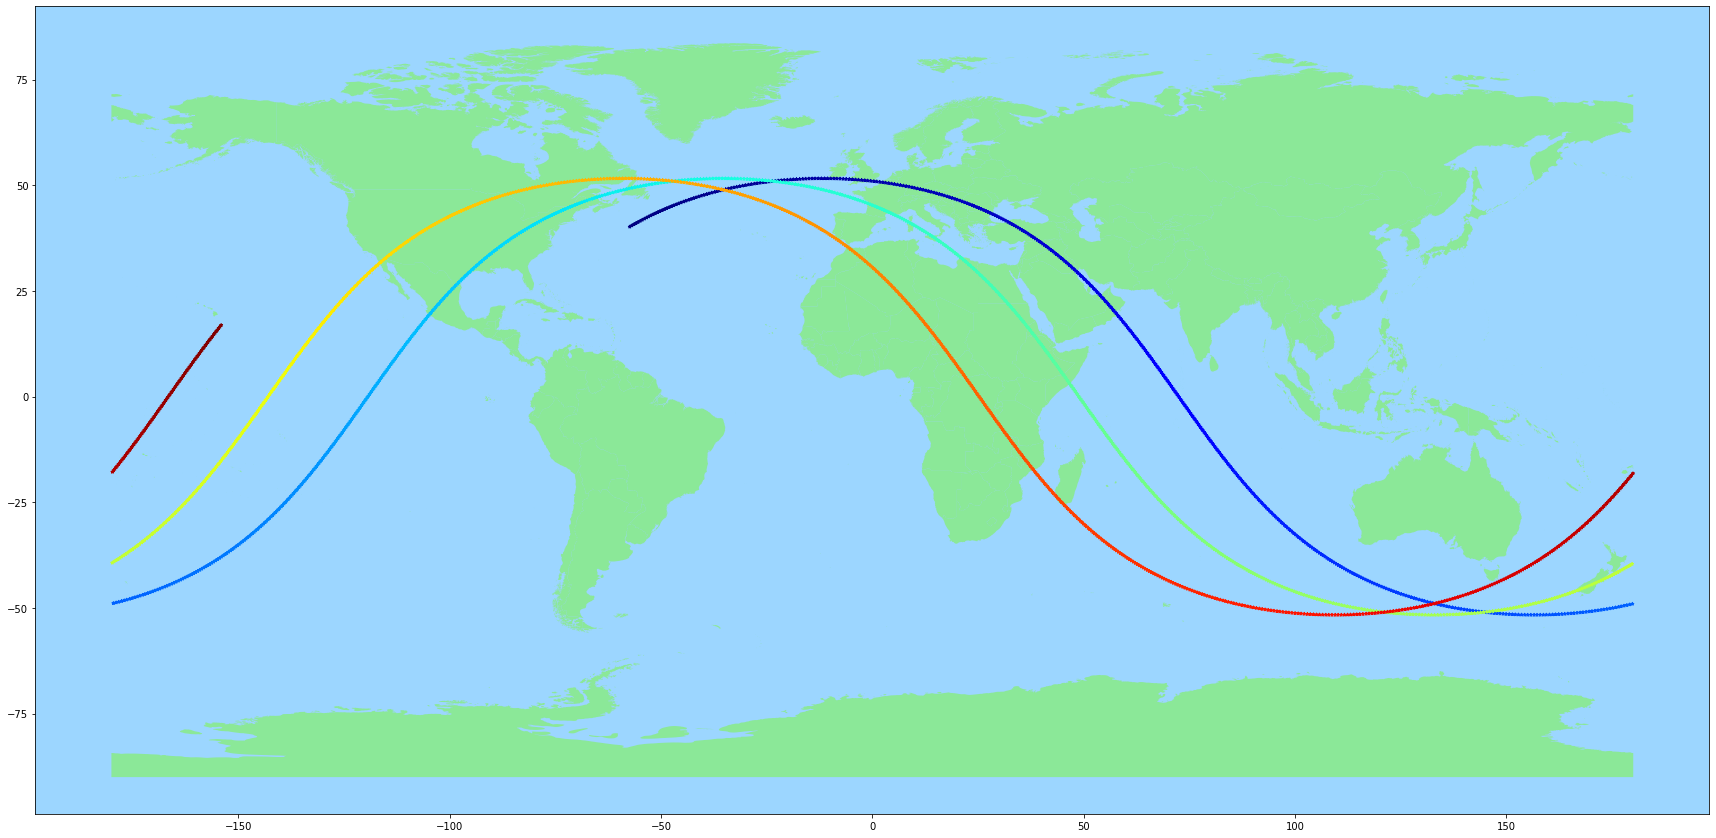

In [25]:
# Plotting to see the ISS overlay the world:
# make earth the base figure
fig, ax = plt.subplots(1, figsize=(30,20))
base = earth_shp.plot(ax=ax, color='#8BE898',)
base.set_facecolor('#9CD6FF')
# plotting the ISS position over the eart with navy
geo_ISS.plot(ax=base, marker="*", markersize=10, cmap = 'jet');
# fig.savefig('ISS path')